<h1 id="tocheading">Table of Contents and Notebook Setup</h1>
<div id="toc"></div>

In [2]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from datetime import timedelta, datetime
from scipy import stats

In [4]:
df = pd.read_csv('WindWaveData.txt', sep='\s+', names=['Wind Speed (m/s)','Wave Height (m)' ])

In [49]:
display(df)

Wind Speed (m/s)  Wave Height (m)
0               10.02             2.61
1               10.15             2.61
2               10.01             2.65
3               10.36             2.64
4               10.56             2.61
5               10.64             2.57
6               10.77             1.69
7               10.82             1.61
8               10.07             1.89
9                9.35             2.39
10               9.65             2.41
11               9.15             2.38
12               8.78             2.31
13               8.53             2.27
14               8.15             2.10
15               8.14             2.18
16               8.30             2.08
17               8.45             2.07
18               9.01             2.08
19               8.92             2.21
20               9.66             2.25
21               9.40             2.28
22               9.44             2.27
23               9.49             2.42
24               9.56             2.35
25               9.27             2.25
26               8.93             2.29
27               8.61             2.34
28               8.89             2.35
29               8.97             2.35
..                ...              ...
207              7.33             2.33
208              7.09             2.36
209              7.07             2.34
210              6.96             2.24
211              6.80             2.26
212              6.45             2.23
213              7.20             2.33
214              6.69             2.37
215              7.00             2.40
216              6.88             2.35
217              6.80             2.36
218              6.04             2.24
219              6.34             2.23
220              6.09             2.38
221              6.34             2.29
222              7.13             2.40
223              6.99             2.45
224              6.43             2.40
225              6.77             2.47
226              6.50             2.53
227              5.83             2.45
228              5.84             2.41
229              6.04             2.53
230              6.04             2.49
231              8.30             2.48
232              9.02             2.40
233              3.55             2.34
234              4.22             2.29
235              4.33             1.76
236              4.14             1.56

[237 rows x 2 columns]

Write a function to compute the correlation coefficient.

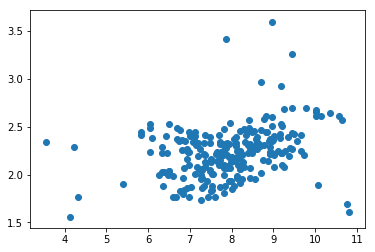

In [50]:
fig, ax = plt.subplots()

ax.scatter(df['Wind Speed (m/s)'],df['Wave Height (m)'])

plt.show()

### Get Mean

In [34]:
def mean(data):
    tot = 0
    for x in data:
        tot = tot +x
    mean= tot/(len(data))
    return mean

In [35]:
print(mean(df['Wind Speed (m/s)']))

7.93447257384


### Get Covariance 

Standard Deviation of X obtained through obtained through ${s_x}^2=s_{xx}$. Returns $s_{xy}$ where

$${s_{xy}}=\frac{1}{N-1}\sum_{i=1}^{N} (X_i-\bar{X})(Y_i-\bar{Y}) $$

In [39]:
def cov(data1, data2):
    d1_mean = mean(data1)
    d2_mean = mean(data2)
    
    tot = 0
    for d1,d2 in zip(data1, data2):
        tot = tot + (d1-d1_mean)*(d2-d2_mean)
    
    return tot/(len(data1)-1)

### Get Sample Correlation Coefficient

Returns $r_{xy}$ where

$$r_{xy}=\frac{s_{xy}}{s_{x}s_{y}} $$

In [43]:
def r_xy(data1, data2):
    s_xy = cov(data1, data2)
    s_x = np.sqrt(cov(data1, data1))
    s_y = np.sqrt(cov(data2, data2))
    
    return s_xy/(s_x*s_y)

In [45]:
r_xy(df['Wind Speed (m/s)'], df['Wave Height (m)'])

0.32062444793771638

### Get Confidence Interval Information

Returns the value of

$$\frac{\sqrt{N-3}}{2}\ln\left( \frac{1+r_{xy}}{1-r_{xy}} \right) $$

Note that if 

$$-1.96 \leq \frac{\sqrt{N-3}}{2}\ln\left( \frac{1+r_{xy}}{1-r_{xy}} \right) \leq 1.96 $$

then we are 95% confident that $r_{xy}$ is <b> not </b> different than zero.

In [55]:
def confidence_95(data1, data2):
    r = r_xy(data1, data2)
    N = len(data1)
    
    value = (np.sqrt(N-3)/2)*np.log((1+r)/(1-r))
    
    return value

In [56]:
confidence_95(df['Wind Speed (m/s)'], df['Wave Height (m)'])

5.0838695607006139

### Parameters for Linear Fit

Linear fit-line for a data set is given by

$$\widetilde{y}=a+bx$$

This line takes in $x$ data and returns and approximate line for what $y$ would be. Note that this <i> assumes $x$ is the indendent variable </i>. The function below returns the parameters $a$ and $b$ obtained from datasets $X$ and $Y$ by the formula

$$b = \frac{\sum X_iY_i - N\bar{X}\bar{Y}}{\sum {X_i}^2-N\bar{X}^2} \hspace{20mm} a=\bar{Y}-b\bar{X}$$

In [71]:
def get_slope_params(data1, data2):
    x_mean = mean(data1)
    y_mean = mean(data2)
    N = len(data1)
    
    sum_xy = 0
    for (x, y) in zip(data1, data2):
        sum_xy = sum_xy + x*y
        
    sum_xsq = 0
    for x in data1:
        sum_xsq = sum_xsq + x*x
        
    b = (sum_xy-N*x_mean*y_mean)/(sum_xsq-N*x_mean**2)
    a = y_mean - b*x_mean
    
    return (a,b)

def get_slope_params_uncertainties(data1, data2):
    N = len(data1)
    a, b = get_slope_params(data1, data2)
    y_approx = a+b*data1
    
    s_eps = 0
    for (y, y_app) in zip(data2, y_approx):
        s_eps = s_eps + (y-y_app)^2
    s_eps = np.sqrt(s_eps/(N-2))
    
    

In [60]:
a, b = get_slope_params(df['Wind Speed (m/s)'], df['Wave Height (m)'])
x_fit = a+b*df['Wind Speed (m/s)']

## Plot Test

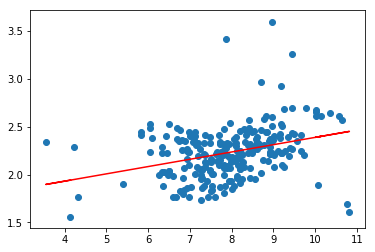

In [63]:
fig, ax = plt.subplots()

ax.scatter(df['Wind Speed (m/s)'],df['Wave Height (m)'])
ax.plot(df['Wind Speed (m/s)'], x_fit, 'r')

plt.show()

### Get Uncertainties 

In [69]:
sp.stats.t.ppf(1-0.025, 10)

2.2281388519649385